<a href="https://colab.research.google.com/github/ConanOReilly/Final_Year_Project/blob/main/Metadata/PreprocessingMetadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing**
Involves the filtration, manipulation, and or augmentation of data before further analysis is conducted.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#**Load and Analyse Dataset**

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/Data/PAD/Metadata/metadata.csv")

In [ ]:
df.head(3).transpose()

,0,1,2
patient_id,PAT_1516,PAT_46,PAT_1545
lesion_id,1765,881,1867
smoke,NaN,False,NaN
drink,NaN,False,NaN
background_father,NaN,POMERANIA,NaN
background_mother,NaN,POMERANIA,NaN
age,8,55,77
pesticide,NaN,False,NaN
gender,NaN,FEMALE,NaN
skin_cancer_history,NaN,True,NaN


In [ ]:
df.shape

(2298, 26)

In [ ]:
# Check class distribution
print(df["diagnostic"].value_counts())

diagnostic
BCC    845
ACK    730
NEV    244
SEK    235
SCC    192
MEL     52
Name: count, dtype: int64


In [ ]:
# Inspect missing values
print(df.isnull().sum())

patient_id               0
lesion_id                0
smoke                  804
drink                  804
background_father      818
background_mother      822
age                      0
pesticide              804
gender                 804
skin_cancer_history    804
cancer_history         804
has_piped_water        804
has_sewage_system      804
fitspatrick            804
region                   0
diameter_1             804
diameter_2             804
diagnostic               0
itch                     0
grew                     0
hurt                     0
changed                  0
bleed                    0
elevation                0
img_id                   0
biopsed                  0
dtype: int64


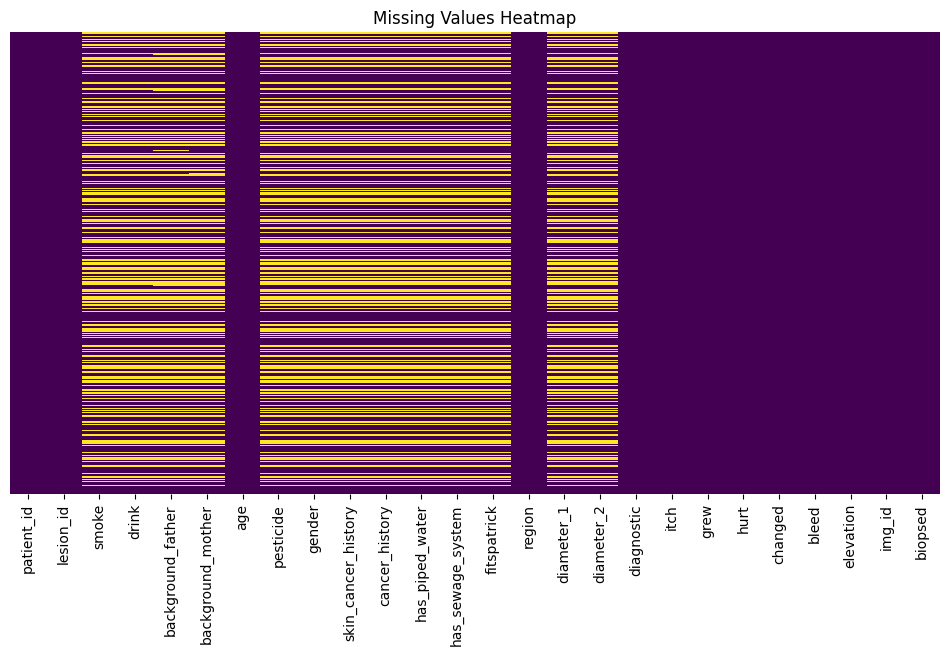

In [ ]:
# Plot missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# **Handle Missing Values**

**Mode Imputation**

In [ ]:
# Mode imputation
categorical_columns = [
    "smoke", "drink", "pesticide", "gender", "skin_cancer_history",
    "cancer_history", "has_piped_water", "has_sewage_system", "fitspatrick", "region",
    "background_father", "background_mother"
]
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df.head()

<ipython-input-9-ed058d0e5bd7>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,False,False,POMERANIA,POMERANIA,8,False,FEMALE,False,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,False,False,POMERANIA,POMERANIA,77,False,FEMALE,False,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,False,False,POMERANIA,POMERANIA,75,False,FEMALE,False,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


**KNN Imputation**

In [ ]:
# Select numerical columns to impute
numerical_columns = ["diameter_1", "diameter_2"]

# Applying KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])

# Display updated dataset
print("KNN Imputation Applied:")
print(df[numerical_columns].head())

KNN Imputation Applied:
   diameter_1  diameter_2
0   11.897055    8.852209
1    6.000000    5.000000
2   11.897055    8.852209
3   11.897055    8.852209
4    5.000000    5.000000


In [ ]:
# Inspect missing values
print(df.isnull().sum())

patient_id             0
lesion_id              0
smoke                  0
drink                  0
background_father      0
background_mother      0
age                    0
pesticide              0
gender                 0
skin_cancer_history    0
cancer_history         0
has_piped_water        0
has_sewage_system      0
fitspatrick            0
region                 0
diameter_1             0
diameter_2             0
diagnostic             0
itch                   0
grew                   0
hurt                   0
changed                0
bleed                  0
elevation              0
img_id                 0
biopsed                0
dtype: int64


In [ ]:
# Check class distribution
print(df["diagnostic"].value_counts())

diagnostic
BCC    845
ACK    730
NEV    244
SEK    235
SCC    192
MEL     52
Name: count, dtype: int64


In [ ]:
# Dropping identify columns
df = df.drop(columns=["patient_id", "lesion_id", "img_id"])
df.head(3).transpose()

,0,1,2
smoke,False,False,False
drink,False,False,False
background_father,POMERANIA,POMERANIA,POMERANIA
background_mother,POMERANIA,POMERANIA,POMERANIA
age,8,55,77
pesticide,False,False,False
gender,FEMALE,FEMALE,FEMALE
skin_cancer_history,False,True,False
cancer_history,True,True,True
has_piped_water,True,True,True


**Encoding Categorical Values**

In [ ]:
# Identify categorical columns
categorical_features = [
    "smoke",
    "drink",
    "pesticide",
    "gender",
    "skin_cancer_history",
    "cancer_history",
    "has_piped_water",
    "has_sewage_system",
    "region",
    "diagnostic",
    "itch",
    "grew",
    "hurt",
    "changed",
    "bleed",
    "elevation",
    "background_father",
    "background_mother"
]

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=False)
df_encoded = df_encoded.astype(int)
df_encoded.head().transpose()

,0,1,2,3,4
age,8,55,77,75,79
fitspatrick,2,3,2,2,1
diameter_1,11,6,11,11,5
diameter_2,8,5,8,8,5
biopsed,0,1,0,0,1
...,...,...,...,...,...
background_mother_POLAND,0,0,0,0,0
background_mother_POMERANIA,1,1,1,1,1
background_mother_PORTUGAL,0,0,0,0,0
background_mother_SPAIN,0,0,0,0,0


In [ ]:
columns_to_remove = [col for col in df_encoded.columns if 'False' in col or 'UNK' in col]
df_encoded = df_encoded.drop(columns=columns_to_remove)
df_encoded.head().transpose()

,0,1,2,3,4
age,8,55,77,75,79
fitspatrick,2,3,2,2,1
diameter_1,11,6,11,11,5
diameter_2,8,5,8,8,5
biopsed,0,1,0,0,1
...,...,...,...,...,...
background_mother_NORWAY,0,0,0,0,0
background_mother_POLAND,0,0,0,0,0
background_mother_POMERANIA,1,1,1,1,1
background_mother_PORTUGAL,0,0,0,0,0


# **Balancing Methods**

In [ ]:
# Defining classes
diagnostic_columns = [col for col in df_encoded.columns if col.startswith("diagnostic_")]

# Define features (X) and target (y)
X = df_encoded.drop(columns=diagnostic_columns)
y = df_encoded[diagnostic_columns]

In [ ]:
# Convert one-hot encoded labels back to categorical format
y_categorical = y.idxmax(axis=1)

In [ ]:
# Define desired sampling strategy
majority_class_count = y_categorical.value_counts().max()
sampling_strategy = {label: majority_class_count for label in y_categorical.unique()}

# Apply Random Oversampling
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X, y_categorical)

# Convert 'y_oversampled' back to one-hot encoding
y_oversampled_onehot = pd.get_dummies(y_oversampled).astype(int)

# Combine back into a balanced dataset
df_oversampled = pd.concat([X_oversampled, y_oversampled_onehot], axis=1)

print("\nAfter Random Oversampling:")
print(y_oversampled_onehot.value_counts())


After Random Oversampling:
diagnostic_ACK  diagnostic_BCC  diagnostic_MEL  diagnostic_NEV  diagnostic_SCC  diagnostic_SEK
0               0               0               0               0               1                 845
                                                                1               0                 845
                                                1               0               0                 845
                                1               0               0               0                 845
                1               0               0               0               0                 845
1               0               0               0               0               0                 845
Name: count, dtype: int64


In [ ]:
# Undersample everything to match the smallest class
sampling_strategy = {label: 40 for label in y.idxmax(axis=1).unique()}

rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X, y.idxmax(axis=1))

# Convert back to one-hot encoding
y_undersampled_onehot = pd.get_dummies(y_undersampled)
y_undersampled_onehot = y_undersampled_onehot.astype(int)

df_undersampled = pd.concat([X_undersampled, y_undersampled_onehot], axis=1)

print("\nAfter Random Undersampling:")
print(y_undersampled.value_counts())


After Random Undersampling:
diagnostic_ACK    40
diagnostic_BCC    40
diagnostic_MEL    40
diagnostic_NEV    40
diagnostic_SCC    40
diagnostic_SEK    40
Name: count, dtype: int64


,age,fitspatrick,diameter_1,diameter_2,biopsed,smoke_True,drink_True,pesticide_True,gender_FEMALE,gender_MALE,...,background_mother_POLAND,background_mother_POMERANIA,background_mother_PORTUGAL,background_mother_SPAIN,diagnostic_ACK,diagnostic_BCC,diagnostic_MEL,diagnostic_NEV,diagnostic_SCC,diagnostic_SEK
1434,53,2,11,8,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
468,63,2,11,8,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
979,67,2,11,8,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1129,50,2,11,8,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1603,72,2,11,8,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,59,4,11,10,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1784,75,2,11,8,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2191,89,2,11,8,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
764,80,2,7,5,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
# Convert one-hot encoded labels back to categorical labels
y_categorical = y.idxmax(axis=1)

# Identify the majority class count
majority_class_count = y_categorical.value_counts().max()

# Define a valid SMOTE sampling strategy
sampling_strategy = {label: majority_class_count for label, count in y_categorical.value_counts().items() if count < majority_class_count}

# Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y_categorical)

# Convert `y_resampled` back to one-hot encoding
y_smote_onehot = pd.get_dummies(y_smote)
y_smote_onehot = y_smote_onehot.astype(int)

df_smote = pd.concat([X_smote, y_smote_onehot], axis=1)

# Display updated class distribution
print("\nAfter SMOTE:")
print(y_smote.value_counts())


After SMOTE:
diagnostic_NEV    845
diagnostic_BCC    845
diagnostic_ACK    845
diagnostic_SEK    845
diagnostic_SCC    845
diagnostic_MEL    845
Name: count, dtype: int64


,age,fitspatrick,diameter_1,diameter_2,biopsed,smoke_True,drink_True,pesticide_True,gender_FEMALE,gender_MALE,...,background_mother_POLAND,background_mother_POMERANIA,background_mother_PORTUGAL,background_mother_SPAIN,diagnostic_ACK,diagnostic_BCC,diagnostic_MEL,diagnostic_NEV,diagnostic_SCC,diagnostic_SEK
0,8,2,11,8,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,55,3,6,5,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,77,2,11,8,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,75,2,11,8,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,79,1,5,5,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,71,2,11,8,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
5066,75,2,11,8,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
5067,73,2,11,8,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
5068,76,2,11,8,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
# Function to train and evaluate a Random Forest model
def train_random_forest(X, y, method_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    print(f"\nEvaluation for {method_name}:")
    print(classification_report(y_test, y_pred))

In [ ]:
# Train and evaluate Random Forest for each method
train_random_forest(X, y_categorical, "Original Data")


Evaluation for Original Data:
                precision    recall  f1-score   support

diagnostic_ACK       0.84      0.84      0.84       146
diagnostic_BCC       0.81      0.95      0.88       169
diagnostic_MEL       0.60      0.30      0.40        10
diagnostic_NEV       0.84      0.86      0.85        49
diagnostic_SCC       0.88      0.54      0.67        39
diagnostic_SEK       0.81      0.62      0.70        47

      accuracy                           0.82       460
     macro avg       0.80      0.68      0.72       460
  weighted avg       0.82      0.82      0.82       460



In [ ]:
train_random_forest(X_oversampled, y_oversampled, "Random Oversampling")


Evaluation for Random Oversampling:
                precision    recall  f1-score   support

diagnostic_ACK       0.93      0.95      0.94       169
diagnostic_BCC       0.96      0.91      0.93       169
diagnostic_MEL       1.00      1.00      1.00       169
diagnostic_NEV       0.98      0.99      0.98       169
diagnostic_SCC       0.97      1.00      0.98       169
diagnostic_SEK       0.98      0.96      0.97       169

      accuracy                           0.97      1014
     macro avg       0.97      0.97      0.97      1014
  weighted avg       0.97      0.97      0.97      1014



In [ ]:
train_random_forest(X_undersampled, y_undersampled, "Random Undersampling")


Evaluation for Random Undersampling:
                precision    recall  f1-score   support

diagnostic_ACK       0.67      0.50      0.57         8
diagnostic_BCC       0.38      0.38      0.38         8
diagnostic_MEL       0.67      0.75      0.71         8
diagnostic_NEV       0.88      0.88      0.88         8
diagnostic_SCC       0.44      0.50      0.47         8
diagnostic_SEK       0.88      0.88      0.88         8

      accuracy                           0.65        48
     macro avg       0.65      0.65      0.65        48
  weighted avg       0.65      0.65      0.65        48



In [ ]:
train_random_forest(X_smote, y_smote, "SMOTE")


Evaluation for SMOTE:
                precision    recall  f1-score   support

diagnostic_ACK       0.92      0.78      0.84       169
diagnostic_BCC       0.82      0.91      0.86       169
diagnostic_MEL       0.99      0.99      0.99       169
diagnostic_NEV       0.92      0.93      0.92       169
diagnostic_SCC       0.91      0.91      0.91       169
diagnostic_SEK       0.89      0.92      0.91       169

      accuracy                           0.91      1014
     macro avg       0.91      0.91      0.91      1014
  weighted avg       0.91      0.91      0.91      1014



In [ ]:
# Function to perform cross-validation
def cross_validate_model(X, y, method_name):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=5)

    print(f"\nCross-Validation Results for {method_name}:")
    print("Cross-validation scores:", cv_scores)
    print("Mean CV Accuracy:", cv_scores.mean())

In [ ]:
# Run Cross-Validation on Oversampled & SMOTE Datasets
cross_validate_model(X_oversampled, y_oversampled, "Random Oversampling")
cross_validate_model(X_smote, y_smote, "SMOTE")


Cross-Validation Results for Random Oversampling:
Cross-validation scores: [0.95266272 0.9566075  0.96548323 0.95857988 0.96449704]
Mean CV Accuracy: 0.9595660749506904

Cross-Validation Results for SMOTE:
Cross-validation scores: [0.81755424 0.89842209 0.93589744 0.93688363 0.90927022]
Mean CV Accuracy: 0.8996055226824456


In [ ]:
# Function to visualize feature importance
def plot_feature_importance(model, X, method_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:]

    plt.figure(figsize=(10, 6))
    plt.title(f"Top 10 Feature Importances ({method_name})")
    plt.barh(range(len(indices)), importances[indices], align="center")
    plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
    plt.xlabel("Feature Importance Score")
    plt.show()

In [ ]:
# Function to compare train vs. test accuracy
def compare_train_test(X, y, method_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Compute Train & Test Accuracy
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    print(f"\n{method_name} - Training Accuracy: {train_acc:.4f}")
    print(f"{method_name} - Test Accuracy: {test_acc:.4f}")

    # Print classification report
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0))

    return model

In [ ]:
# Compare for Random Oversampling
model_oversampled = compare_train_test(X_oversampled, y_oversampled, "Random Oversampling")

# Compare for SMOTE
model_smote = compare_train_test(X_smote, y_smote, "SMOTE")


Random Oversampling - Training Accuracy: 0.9973
Random Oversampling - Test Accuracy: 0.9684
                precision    recall  f1-score   support

diagnostic_ACK       0.93      0.95      0.94       169
diagnostic_BCC       0.96      0.91      0.93       169
diagnostic_MEL       1.00      1.00      1.00       169
diagnostic_NEV       0.98      0.99      0.98       169
diagnostic_SCC       0.97      1.00      0.98       169
diagnostic_SEK       0.98      0.96      0.97       169

      accuracy                           0.97      1014
     macro avg       0.97      0.97      0.97      1014
  weighted avg       0.97      0.97      0.97      1014


SMOTE - Training Accuracy: 0.9896
SMOTE - Test Accuracy: 0.9063
                precision    recall  f1-score   support

diagnostic_ACK       0.92      0.78      0.84       169
diagnostic_BCC       0.82      0.91      0.86       169
diagnostic_MEL       0.99      0.99      0.99       169
diagnostic_NEV       0.92      0.93      0.92       16

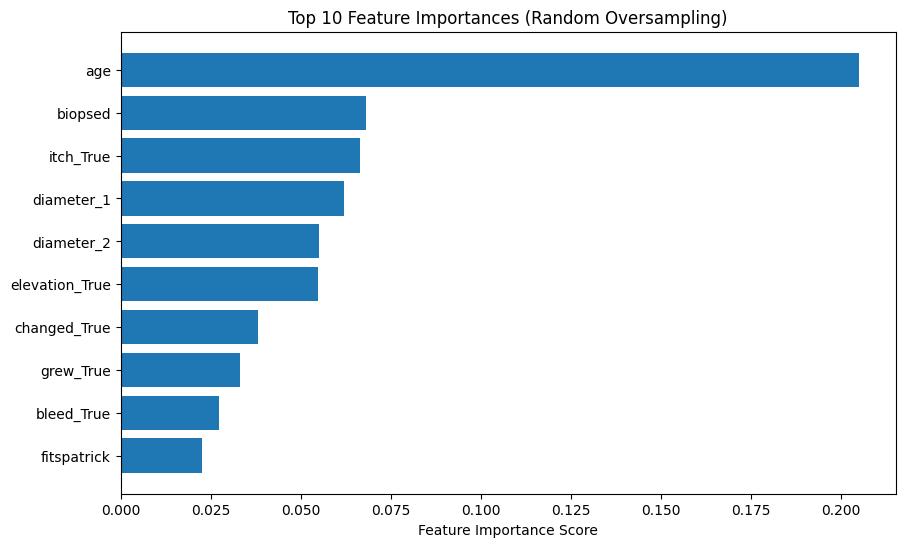

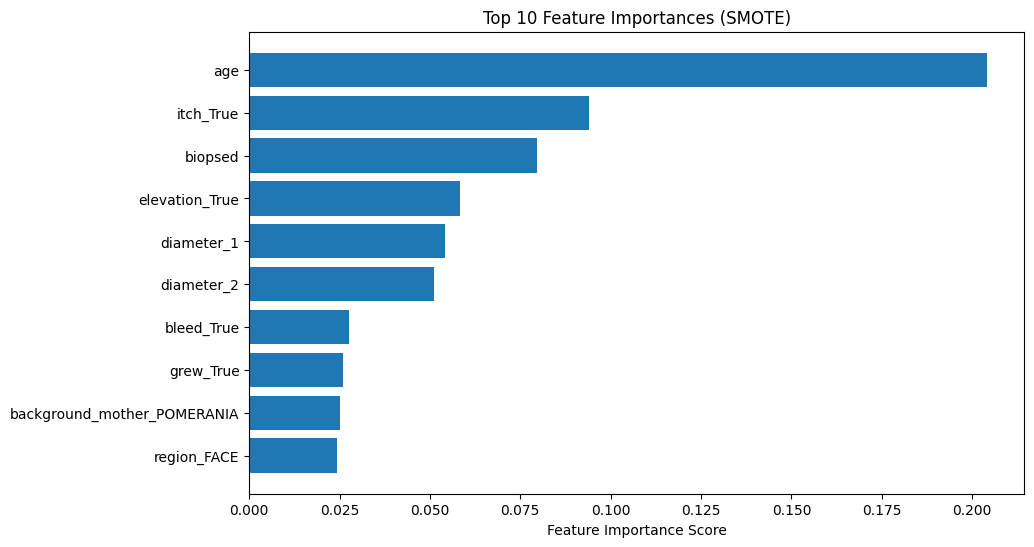

In [ ]:
# Plot feature importance for both models
plot_feature_importance(model_oversampled, X_oversampled, "Random Oversampling")
plot_feature_importance(model_smote, X_smote, "SMOTE")

In [ ]:
# Remove 'Age' Feature
X_oversampled_no_age = X_oversampled.drop(columns=['age'])
X_smote_no_age = X_smote.drop(columns=['age'])

In [ ]:
# Compare for Random Oversampling without 'Age'
model_oversampled_no_age = compare_train_test(X_oversampled_no_age, y_oversampled, "Random Oversampling (No Age)")

# Compare for SMOTE without 'Age'
model_smote_no_age = compare_train_test(X_smote_no_age, y_smote, "SMOTE (No Age)")


Random Oversampling (No Age) - Training Accuracy: 0.9172
Random Oversampling (No Age) - Test Accuracy: 0.8777
                precision    recall  f1-score   support

diagnostic_ACK       0.83      0.83      0.83       169
diagnostic_BCC       0.96      0.93      0.94       169
diagnostic_MEL       1.00      1.00      1.00       169
diagnostic_NEV       0.81      0.79      0.80       169
diagnostic_SCC       0.96      1.00      0.98       169
diagnostic_SEK       0.71      0.72      0.71       169

      accuracy                           0.88      1014
     macro avg       0.88      0.88      0.88      1014
  weighted avg       0.88      0.88      0.88      1014


SMOTE (No Age) - Training Accuracy: 0.9201
SMOTE (No Age) - Test Accuracy: 0.8294
                precision    recall  f1-score   support

diagnostic_ACK       0.88      0.72      0.79       169
diagnostic_BCC       0.83      0.88      0.85       169
diagnostic_MEL       0.98      0.99      0.99       169
diagnostic_NEV    

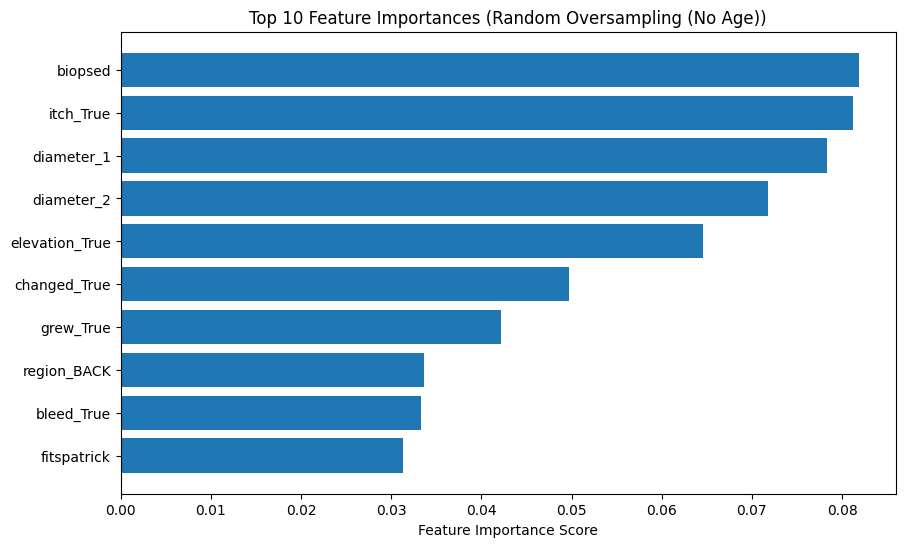

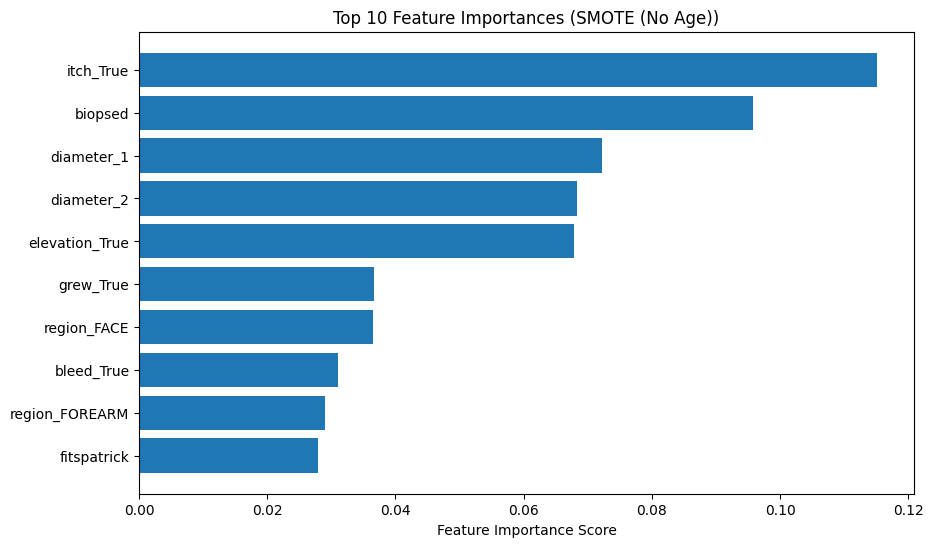

In [ ]:
# Plot feature importance for both models without 'Age'
plot_feature_importance(model_oversampled_no_age, X_oversampled_no_age, "Random Oversampling (No Age)")
plot_feature_importance(model_smote_no_age, X_smote_no_age, "SMOTE (No Age)")

In [ ]:
# Remove 'biopsed' feature
X_oversampled_no_bio = X_oversampled_no_age.drop(columns=['biopsed'])
X_smote_no_bio = X_smote_no_age.drop(columns=['biopsed'])

In [ ]:
# Compare for Random Oversampling without 'biopsed'
model_oversampled_no_bio = compare_train_test(X_oversampled_no_bio, y_oversampled, "Random Oversampling (No biopsed)")

# Compare for SMOTE without 'biopsed'
model_smote_no_bio = compare_train_test(X_smote_no_bio, y_smote, "SMOTE (No biopsed)")


Random Oversampling (No biopsed) - Training Accuracy: 0.9172
Random Oversampling (No biopsed) - Test Accuracy: 0.8757
                precision    recall  f1-score   support

diagnostic_ACK       0.83      0.83      0.83       169
diagnostic_BCC       0.95      0.92      0.93       169
diagnostic_MEL       1.00      1.00      1.00       169
diagnostic_NEV       0.81      0.79      0.80       169
diagnostic_SCC       0.98      1.00      0.99       169
diagnostic_SEK       0.70      0.70      0.70       169

      accuracy                           0.88      1014
     macro avg       0.88      0.88      0.88      1014
  weighted avg       0.88      0.88      0.88      1014


SMOTE (No biopsed) - Training Accuracy: 0.9199
SMOTE (No biopsed) - Test Accuracy: 0.8245
                precision    recall  f1-score   support

diagnostic_ACK       0.85      0.69      0.76       169
diagnostic_BCC       0.82      0.89      0.85       169
diagnostic_MEL       0.99      0.99      0.99       169
di

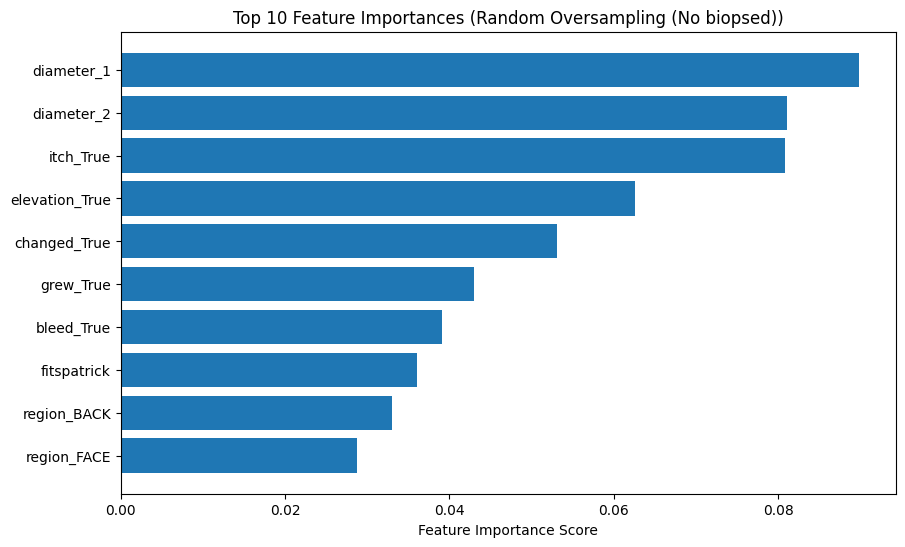

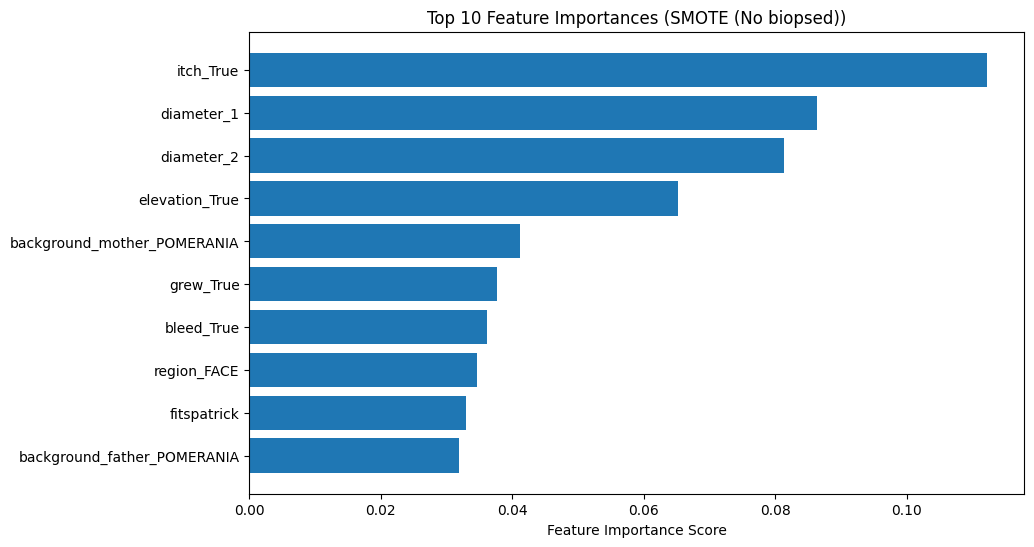

In [ ]:
# Plot feature importance for both models without 'Age'
plot_feature_importance(model_oversampled_no_bio, X_oversampled_no_bio, "Random Oversampling (No biopsed)")
plot_feature_importance(model_smote_no_bio, X_smote_no_bio, "SMOTE (No biopsed)")

In [ ]:
# Create binary label
y_mel = (y_oversampled == "diagnostic_MEL").astype(int)

print(y_mel.value_counts())

0    4225
1     845
Name: count, dtype: int64


In [ ]:
# Align the shapes
common_indices = X_oversampled_no_bio.index.intersection(y_mel.index)
X_oversampled_no_bio = X_oversampled_no_bio.loc[common_indices]
y_mel = y_mel.loc[common_indices]

print("Final shapes:", X_oversampled_no_bio.shape, y_mel.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_oversampled_no_bio, y_mel, test_size=0.2, random_state=42, stratify=y_mel)

# Train the RandomForest model for "MEL"
model_mel = RandomForestClassifier(n_estimators=100, random_state=42)
model_mel.fit(X_train, y_train)



Final shapes: (5070, 54) (5070,)


RandomForestClassifier(random_state=42)

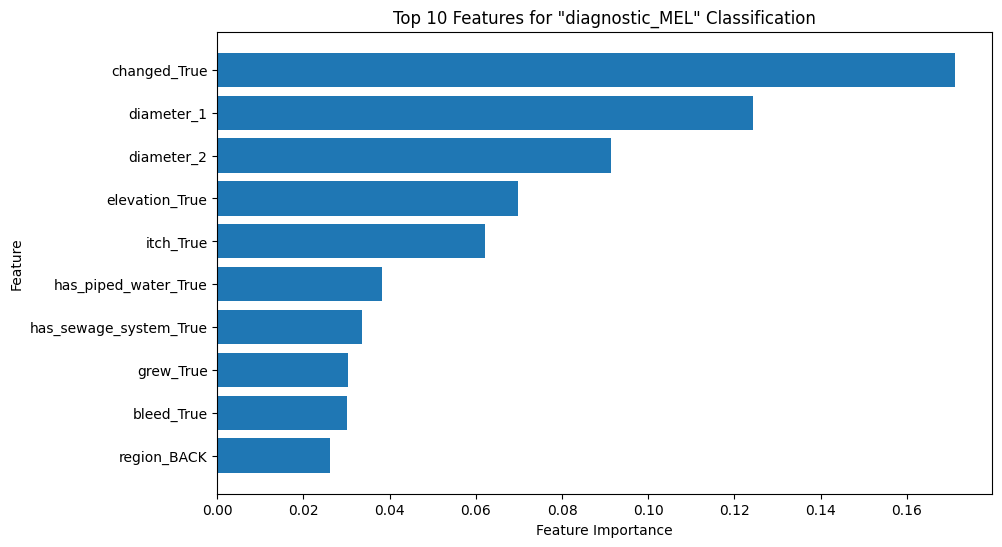

In [ ]:
# Get feature importance
feature_importances = model_mel.feature_importances_
feature_names = X_oversampled_no_bio.columns

# Create a DataFrame and sort by importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features for "diagnostic_MEL" Classification')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
df_oversampled.to_csv("/content/drive/MyDrive/Final Year Project/Data/PAD/Metadata/Metadataoversampled.csv", index=False)